In [12]:
import numpy as np

def perceptron(x1, x2, weights, bias):
    x = np.array([x1, x2])
    w = np.array(weights)
    return int(np.dot(x, w) + bias > 0)
    # return 1 if (w1*x1 + w2*x2 + b) > 0 else 0

# AND Gate  : 두 입력이 모두 1일 때만 1이 되도록 가중치와 편향 설정
print("AND:", perceptron(1, 1, [0.5, 0.5], -0.7))

# NAND Gate : AND 결과를 반대로 만들기 위해 가중치를 음수로 설정
print("NAND:", perceptron(1, 1, [-0.5, -0.5], 0.7))

# OR Gate : 하나라도 1이면 기준값을 넘도록 편향을 작게 설정
print("OR:", perceptron(1, 0, [0.5, 0.5], -0.2))

AND: 1
NAND: 0
OR: 1


퍼셉트론은 가중합 + 편향이 기준(0)을 넘는지로 0/1 을 결정

In [13]:
def weighted_sum(inputs, weights, bias):
    # 입력 벡터와 가중치 벡터의 내적 + 편향
    return np.dot(inputs, weights) + bias

inputs = [1, 0]                                 # 입력값
weights = [0.8, -0.5]                           # 각 입력에 대한 중요도
bias = 0.2                                      # 판단 기준을 조정하는 편향
output = weighted_sum(inputs, weights, bias)
print("Weighted Sum:", output)

Weighted Sum: 1.0


In [14]:
from sklearn.neural_network import MLPClassifier

# XOR 문제 해결
X = [[0, 0], [0, 1], [1, 0], [1, 1]]        # 입력값 (4,2)
y = [0, 1, 1, 0]    # 출력값

# 다층 퍼셉트론 모델
mlp = MLPClassifier(
    hidden_layer_sizes=(2,)     # 은닉층 구조 : 은닉층 1개, 뉴런 2개
    , activation='relu'         # 은닉층 홠겅화 함수 (relu : 비선형성 부여)
    , max_iter=1000)            # 최대 학습 반복 횟수
mlp.fit(X, y)

print("Prediction:", mlp.predict(X))

Prediction: [1 1 0 1]


```
hidden_layer_size(2,), #은닉층 구조 : 은닉층 1개, 뉴런 2개
hidden_layer_size(4,), #은닉층 1개, 뉴런 4개
hidden_layer_size(3, 2), #은닉층 2개 (첫 층 3개, 두번째 층 2개)

은닉층의 activation (활성화함수)
주요 사용하는 것: relu 계열 (
    - relu : 가장 많이 사용,(음수에서 기울기가 죽음)
    - Leaky relu : relu에서 발생하는 죽은 기울기 문제를 해결 (음수 영역에서도 사용가능)
    - ELU, GELU : 딥러닝 Transformer 에서 자주 사용한다.
)

tanh  : -1~1 범위. 비선형 문제에 적합
출력 범위가 -1 ~ 1 인 것이 의미가 있을 때 사용한다.
    - 입력 / 출력이 0을 중심으로 대칭을 이룰 때
    - RNN 계열 (전통적인 RNN, LSTM)

logistic : 시그모이드 함수 (초기 신경망에서 사용)

----------------------------------------------------------------------------------------

출력층의 activation (활성화함수)
이진분류 : sigmoid (출력 범위 0~1. 결과를 확률로 해석 가능) 
다중 분류 : softmax (출력 범위 0~1. 각 클래스에 대한 확률 분포. 모든 출력값의 합 = 1)

회귀 : 예측 값 그대로 사용



```

시그모이드 함수 구현

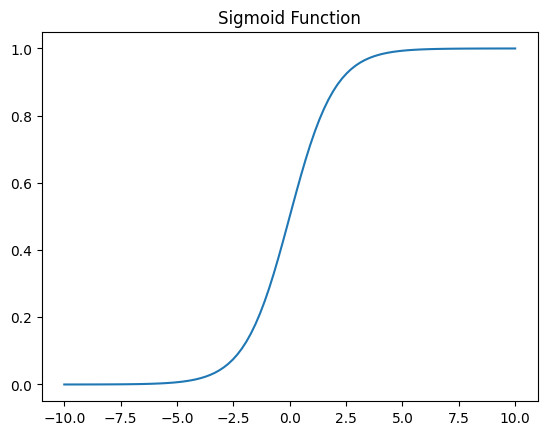

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

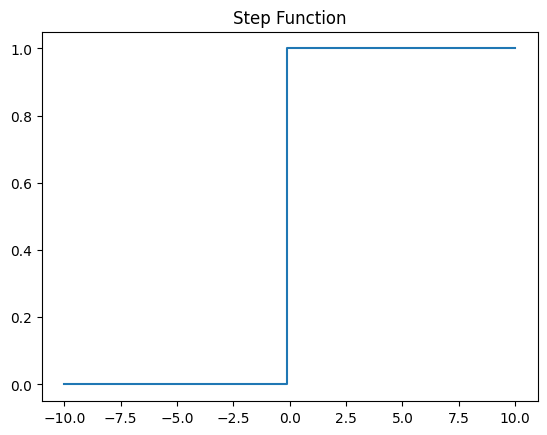

In [16]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.linspace(-10, 10, 100)
y = step_function(x)
plt.step(x, y)
plt.title("Step Function")
plt.show()

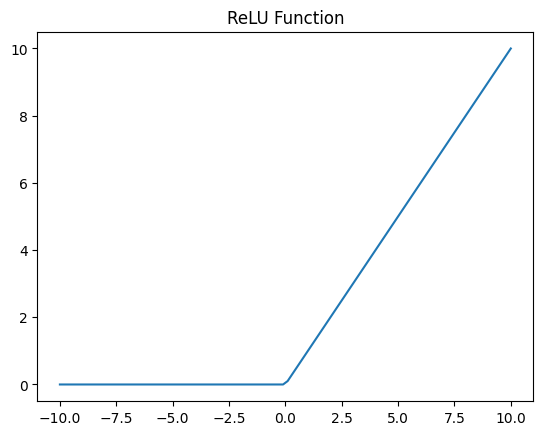

In [17]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)
plt.plot(x, y)
plt.title("ReLU Function")
plt.show()

```
- relu 함수의 특징
1. 기울기(함수가 얼마나 변하는가, 수학값으로는 미분값) 소실 문제 완화
    - 기울기가 1이다? 입력이 바뀌는 만큼 그대로 출력값도 바뀐다. => Relu 양수 기울기 1
    - lr는 하이퍼 파라미터 사용하면 가중치 업데이트시에 (lr * 기울기) 값으로 가중치값을 업데이트 해준다.
    - 결론적으로 역전파시 기울기가 줄어들지 않고 전달이 잘 된다. = 깊은 신경망에서도 신호가 잘 전달된다.

2. 계산 효율이 매우 높다.
    - 지수 계산이 없고 단순하게 비교 연산 => 대규모 모델 학습에 유리


한계점은 음수 영역에서 기울기가 0 -> Dead ReLU 문제 발생
=> Leaky ReLU, Parametric ReLU, ELU 등

결론적으로는 은닉층 활성화함수로 표준
하지만 출력층에서는 문제 유형에 따라 제한적으로 사용한다.
```

LeakyReLU

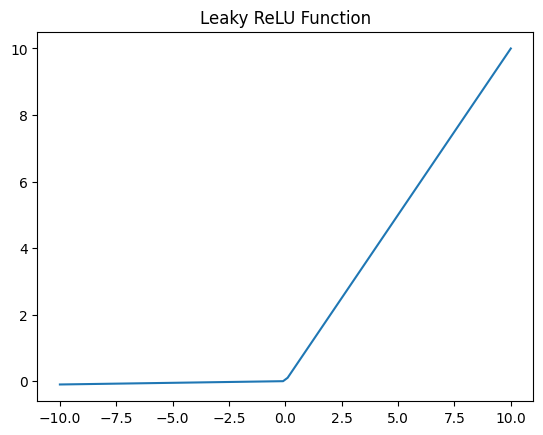

In [22]:
def leaky_relu(x, alpha=0.01):
    # x가 0 이상이면 X값 그대로 사용, 0 미만이면 작은 기울기(alpha)를 곱해서 출력
    return np.where(x >= 0, x, alpha * x)

x = np.linspace(-10, 10, 100)
y = leaky_relu(x)
plt.plot(x, y)
plt.title("Leaky ReLU Function")
plt.show()

```
- Relu의 문제
    - x < 0 구간에서 출력 = 0, 기울기 = 0
    - 한번 음수로 떨어지면 가중치 업데이트가 멈춰버리는 Dead ReLU

- Leaky ReLU
    - x < 0 기울기 a 곱해 유지 => 학습신호가 0으로 완전히 끊기지 않는다.

결론적으로 Leaky ReLU가 ReLU의 단순함을 유지하면서, 음수영역에서도 학습이 멈추지 않도록 만든 활성화 함수
```

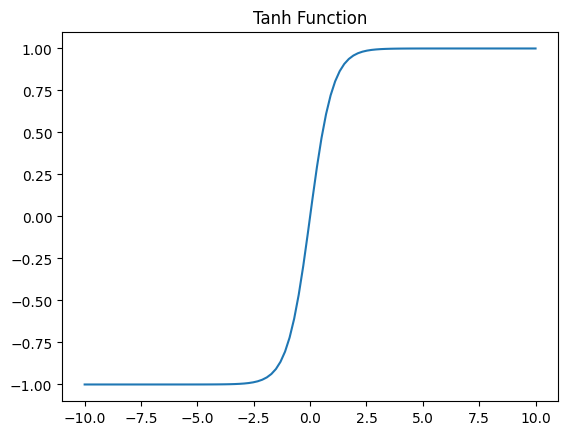

In [ ]:
def tanh(x):
    return np.tanh(x)   # 입력값을 -1 ~ 1

x = np.linspace(-10, 10, 100)
y = tanh(x)
plt.plot(x, y)
plt.title("Tanh Function")
plt.show()